# Project PT results to Italy

This notebook exploits results of Pistoia to predict the tourists arrivals in Italy. The projection is done only for the first three months of 2020.

In [8]:
# load data from eurostat + predictions for 2020
import pandas as pd
df = pd.read_csv('data/arrivals_prediction.csv')
X = df['x']
y = df['y']

y = y[:-7]
len(y)

99

In [9]:
dfp = pd.read_csv('data/arrivals_pistoia.csv')
dfp

,Year,Month,Arrivals
0,2012,1,14751
1,2012,2,18562
2,2012,3,41478
3,2012,4,55215
4,2012,5,53843
...,...,...,...
94,2019,11,47747
95,2019,12,40886
96,2020,1,36281
97,2020,2,33587


In [10]:
import numpy as np
yp = dfp['Arrivals']
Xp = np.arange(1,len(yp)+1)


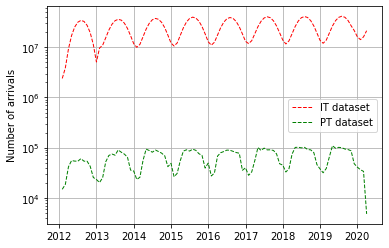

In [11]:
import matplotlib.pyplot as plt
import numpy as np



#plt.plot(Xp, yp, color="green", linewidth=1,linestyle='dashed')

step = 1
x_ticks = np.arange(0, len(X)+step+12, step=12*step)
x_labels = []
x_labels.append(2012)
for i in range(1, len(x_ticks)+13):
    x_labels.append(x_labels[i-1]+step)
plt.xticks(x_ticks, x_labels)
plt.ylabel('Number of arrivals')
plt.grid()
plt.plot(Xp, y, color="red", linewidth=1,linestyle='dashed', label="IT dataset")
plt.plot(Xp, yp, color="green", linewidth=1,linestyle='dashed', label="PT dataset")
plt.legend()
plt.yscale("log")
plt.savefig("data/sinusoid_IT_PT.png")
plt.show()




#Pearson Correlation Coefficient and p-value

Perfect: If the value is near ± 1, then it said to be a perfect correlation: as one variable increases, the other variable tends to also increase (if positive) or decrease (if negative).

High degree: If the coefficient value lies between ± 0.50 and ± 1, then it is said to be a strong correlation.
Moderate degree: If the value lies between ± 0.30 and ± 0.49, then it is said to be a medium correlation.
Low degree: When the value lies below + .29, then it is said to be a small correlation.
No correlation: When the value is zero.

Related Pages:
https://www.statisticssolutions.com/pearsons-correlation-coefficient/
https://it.wikipedia.org/wiki/Valore_p

In [12]:
from scipy import stats
z_score_it = stats.zscore(y)
z_score_pt = stats.zscore(yp)
stats.pearsonr(y, yp) 

(0.8689927152098256, 2.132090826350555e-31)

In [13]:
# prendo i dati del 2020
y_2020 = list(y[len(y)-2:])
y_2020

[16116870.32105053, 21411264.96200221]

The `reduction` variable contains the percentage of reduction in tourists arrivals calculated for Pistoia. See the the notebook Analyse Tourism PT for details.

In [14]:
reduction = [-18.26957259, -91.75074666]

In [15]:
yr_2020 = []
for i in range(0, len(y_2020)):
    yr_2020.append(y_2020[i]*(1+reduction[i]/100))
yr_2020

[13172386.998510038, 1766269.4900142162]

In [16]:
y_2020 = list(y[:-2])
for i in range(0, len(yr_2020)):
    y_2020.append(yr_2020[i])

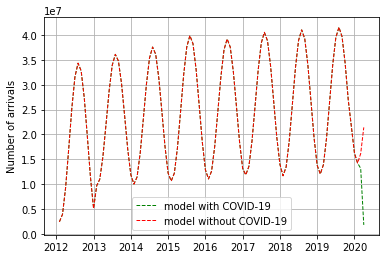

In [17]:
plt.xticks(x_ticks, x_labels)
plt.ylabel('Number of arrivals')
plt.grid()
plt.plot(Xp, y_2020, color="green", linewidth=1,linestyle='dashed', label="model with COVID-19")
plt.plot(Xp, y, color="red", linewidth=1,linestyle='dashed', label="model without COVID-19")
plt.legend()
plt.savefig("plots/covid_prediction_it.png")
plt.show()